In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('matches.csv')
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
df.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [ ]:
df.dtypes

,0
id,int64
season,object
city,object
date,object
match_type,object
player_of_match,object
venue,object
team1,object
team2,object
toss_winner,object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [ ]:
df.isnull().sum() # checking null value

,0
id,0
season,0
city,51
date,0
match_type,0
player_of_match,5
venue,0
team1,0
team2,0
toss_winner,0


In [ ]:
df['city'].fillna('Mumbai', inplace=True) # fill with mode of this columns
df['winner'].fillna('No Result', inplace=True)
df['player_of_match'].fillna('Not awarded',inplace=True)

median_margin = df['result_margin'].median()
df['result_margin'].fillna(median_margin, inplace=True)

median_target_runs= df['target_runs'].median()
df['target_runs'].fillna(median_target_runs, inplace=True)

median_target_overs = df['target_overs'].median()
df['target_overs'].fillna(median_target_overs, inplace=True)

df['method'].fillna('No method applied', inplace=True)

df.isnull().sum() # Now 0 null values

,0
id,0
season,0
city,0
date,0
match_type,0
player_of_match,0
venue,0
team1,0
team2,0
toss_winner,0


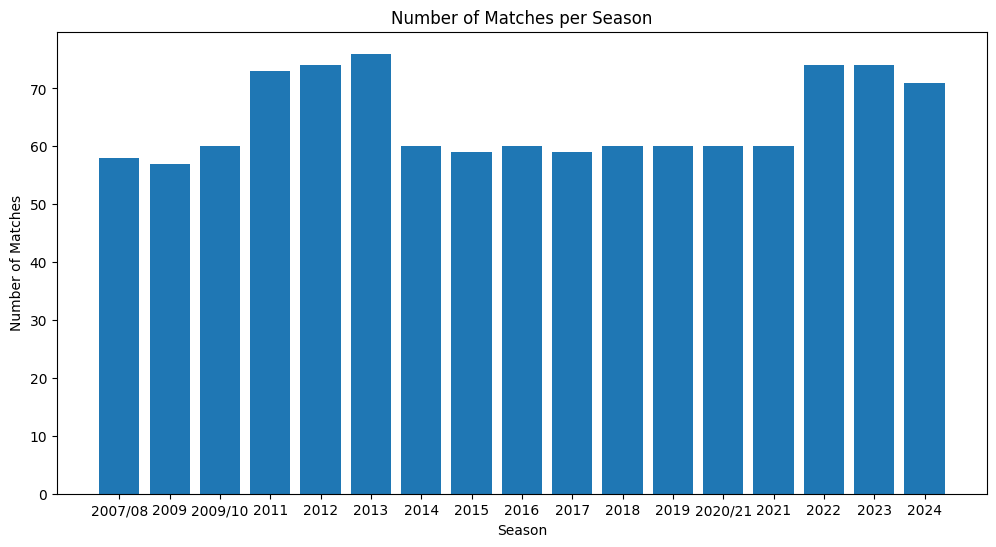

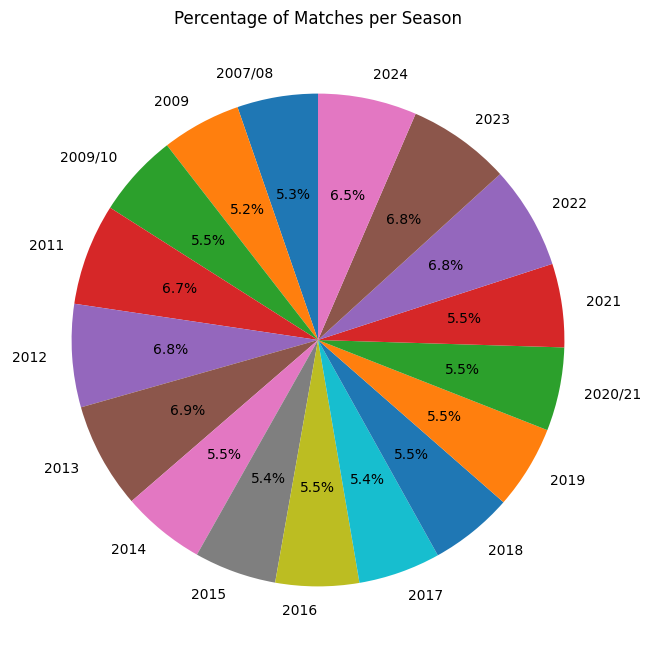

In [ ]:
# prompt: bargraph and pie chart for number of matches per season

import matplotlib.pyplot as plt
# Bar Graph for number of matches per season
matches_per_season = df.groupby('season')['id'].count()
plt.figure(figsize=(12, 6))
plt.bar(matches_per_season.index, matches_per_season.values)
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.title('Number of Matches per Season')
plt.show()

# Pie Chart for number of matches per season
plt.figure(figsize=(8, 8))
plt.pie(matches_per_season.values, labels=matches_per_season.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Matches per Season')
plt.show()


In [ ]:
df['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Brabourne Stadium, Mumbai',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Maharashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sh

In [ ]:
df['venue']=df['venue'].str.replace('Feroz Shah Kotla','Arun Jaitley Stadium')
df['venue']=df['venue'].str.replace('Arun Jaitley Stadium, Delhi','Arun Jaitley Stadium')
df['venue']=df['venue'].str.replace('Eden Gardens, Kolkata','Eden Gardens')
df['venue']=df['venue'].str.replace('Eden Gardens, Kolkata, Kolkata','Eden Gardens')
df['venue']=df['venue'].str.replace('Wankhede Stadium, Mumbai','Wankhede Stadium')
df['venue']=df['venue'].str.replace('Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh','Punjab Cricket Association Stadium, Mohali')
df['venue']=df['venue'].str.replace('Rajiv Gandhi International Stadium, Uppal, Hyderabad','Rajiv Gandhi International Stadium, Uppal')
df['venue']=df['venue'].str.replace('MA Chidambaram Stadium','MA Chidambaram Stadium, Chepauk')
df['venue']=df['venue'].str.replace('MA Chidambaram Stadium, Chepauk, Chennai','MA Chidambaram Stadium, Chepauk')

In [ ]:
# prompt: top 10 stadiums list

top_10_stadiums = df['venue'].value_counts().head(10)
print(top_10_stadiums)


venue
Wankhede Stadium                              118
Eden Gardens                                   93
Arun Jaitley Stadium                           90
M Chinnaswamy Stadium                          65
Rajiv Gandhi International Stadium, Uppal      62
MA Chidambaram Stadium, Chepauk, Chepauk       48
Sawai Mansingh Stadium                         47
Dubai International Cricket Stadium            46
Punjab Cricket Association Stadium, Mohali     40
Sheikh Zayed Stadium                           29
Name: count, dtype: int64


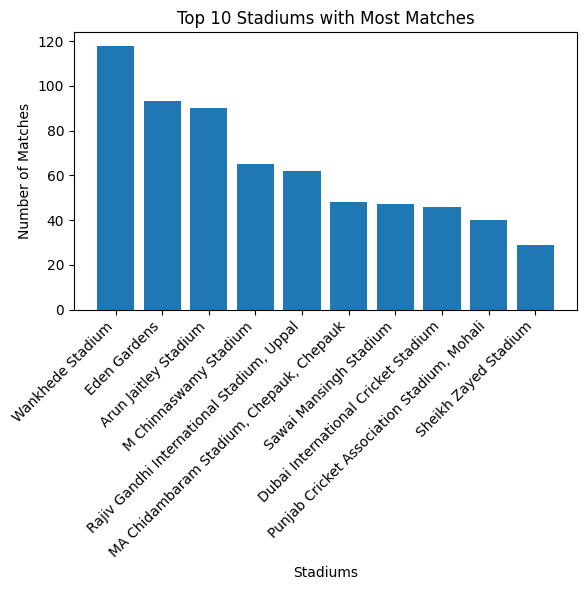

In [ ]:
# prompt: top 10 stadiums bargraph and pie chart

import matplotlib.pyplot as plt

# Bar graph
plt.figure(figsize=(6,6))
plt.bar(top_10_stadiums.index, top_10_stadiums.values)
plt.xlabel("Stadiums")
plt.ylabel("Number of Matches")
plt.title("Top 10 Stadiums with Most Matches")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



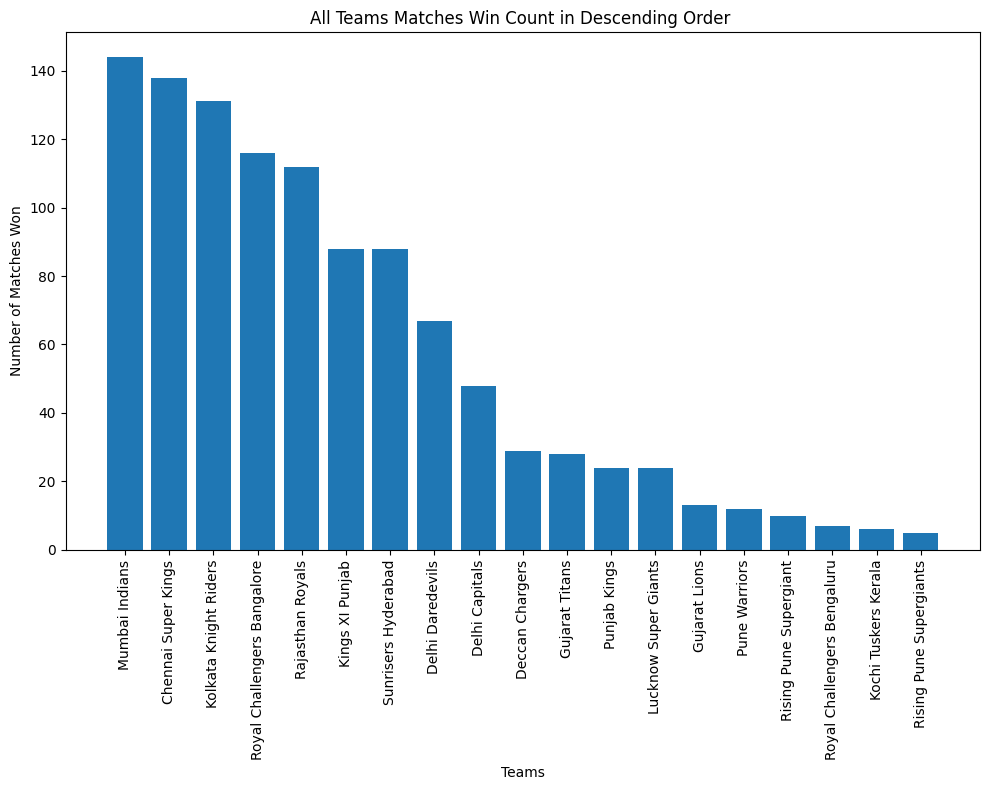

In [ ]:
# prompt: all teams matches win count in descending order bargraph, exclude no result

import matplotlib.pyplot as plt

# Filter out 'No Result' from the winner column
df_filtered = df[df['winner'] != 'No Result']

# Group by winner and count the number of matches won by each team
team_wins = df_filtered.groupby('winner')['id'].count().sort_values(ascending=False)

# Create the bar graph
plt.figure(figsize=(10, 8))
plt.bar(team_wins.index, team_wins.values)
plt.xlabel('Teams')
plt.ylabel('Number of Matches Won')
plt.title('All Teams Matches Win Count in Descending Order ')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


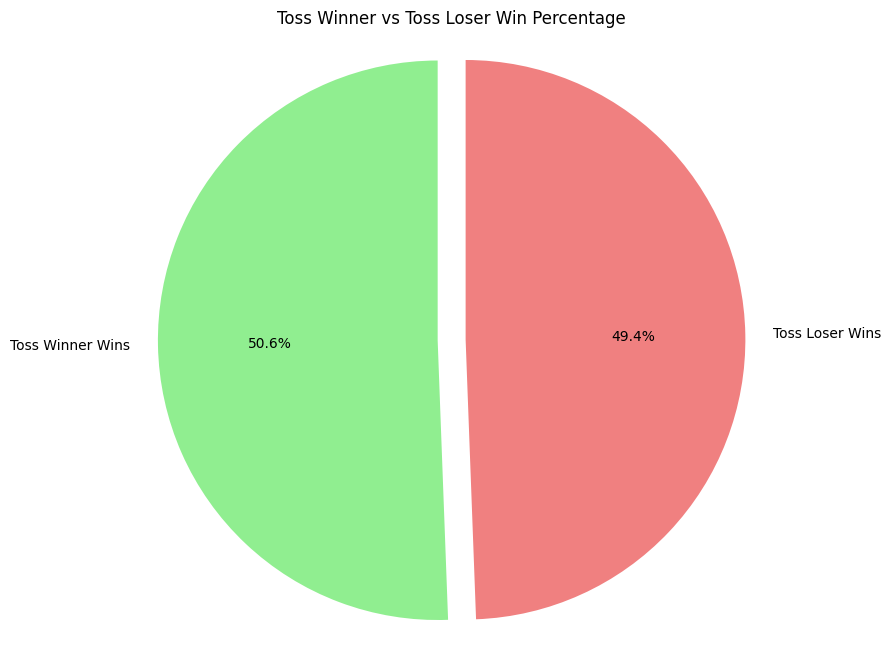

In [ ]:
# prompt: toss winner vs toss loser win percentage pie chart

import matplotlib.pyplot as plt

# Calculate the number of matches won by the toss winner and toss loser
toss_winner_wins = df[df['toss_winner'] == df['winner']].shape[0]
toss_loser_wins = df[df['toss_winner'] != df['winner']].shape[0]

# Create the data for the pie chart
labels = ['Toss Winner Wins', 'Toss Loser Wins']
sizes = [toss_winner_wins, toss_loser_wins]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # Explode the first slice (Toss Winner Wins)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Toss Winner vs Toss Loser Win Percentage')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


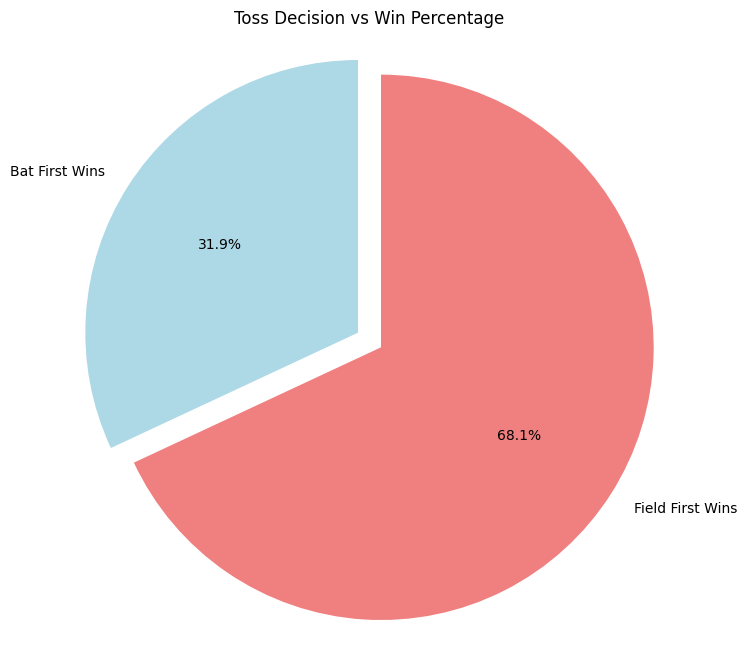

In [ ]:
# prompt: toss decision vs win percentage pie chart

import matplotlib.pyplot as plt
# Calculate the number of matches won by teams batting first and second after winning the toss
bat_first_wins = df[(df['toss_decision'] == 'bat') & (df['toss_winner'] == df['winner'])].shape[0]
bat_second_wins = df[(df['toss_decision'] == 'field') & (df['toss_winner'] == df['winner'])].shape[0]

# Create the data for the pie chart
labels = ['Bat First Wins', 'Field First Wins']
sizes = [bat_first_wins, bat_second_wins]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # Explode the first slice (Bat First Wins)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Toss Decision vs Win Percentage')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


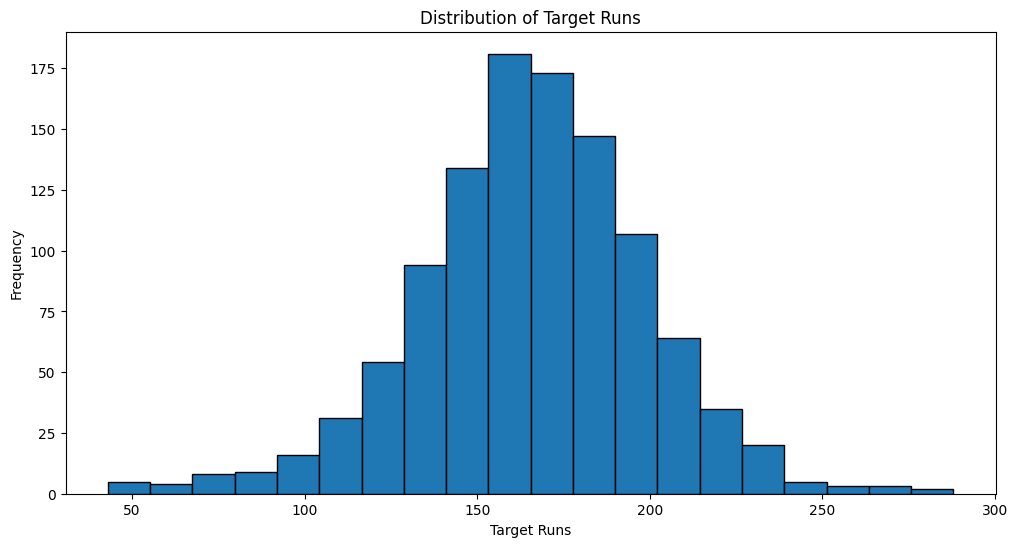

In [ ]:
# prompt: Distribution of Target Runs bar graph

import matplotlib.pyplot as plt
# Assuming 'target_runs' is the column containing the target runs in your DataFrame

plt.figure(figsize=(12, 6))
plt.hist(df['target_runs'], bins=20, edgecolor='black')
plt.xlabel('Target Runs')
plt.ylabel('Frequency')
plt.title('Distribution of Target Runs')
plt.show()


In [ ]:
# prompt: number of unique player of the match, most repeated player of the match with number of times, least
#  player of the match,

# Number of unique players of the match
unique_players_of_match = df['player_of_match'].nunique()
print(f"Number of unique players of the match: {unique_players_of_match}")

# Most repeated player of the match with number of times
most_repeated_player = df['player_of_match'].mode()[0]
most_repeated_player_count = df['player_of_match'].value_counts().max()
print(f"Most repeated player of the match: {most_repeated_player} ({most_repeated_player_count} times)")

# Least repeated player of the match
least_repeated_player = df['player_of_match'].value_counts().idxmin()
least_repeated_player_count = df['player_of_match'].value_counts().min()
print(f"Least repeated player of the match: {least_repeated_player} ({least_repeated_player_count} time)")


Number of unique players of the match: 292
Most repeated player of the match: AB de Villiers (25 times)
Least repeated player of the match: Mukesh Choudhary (1 time)


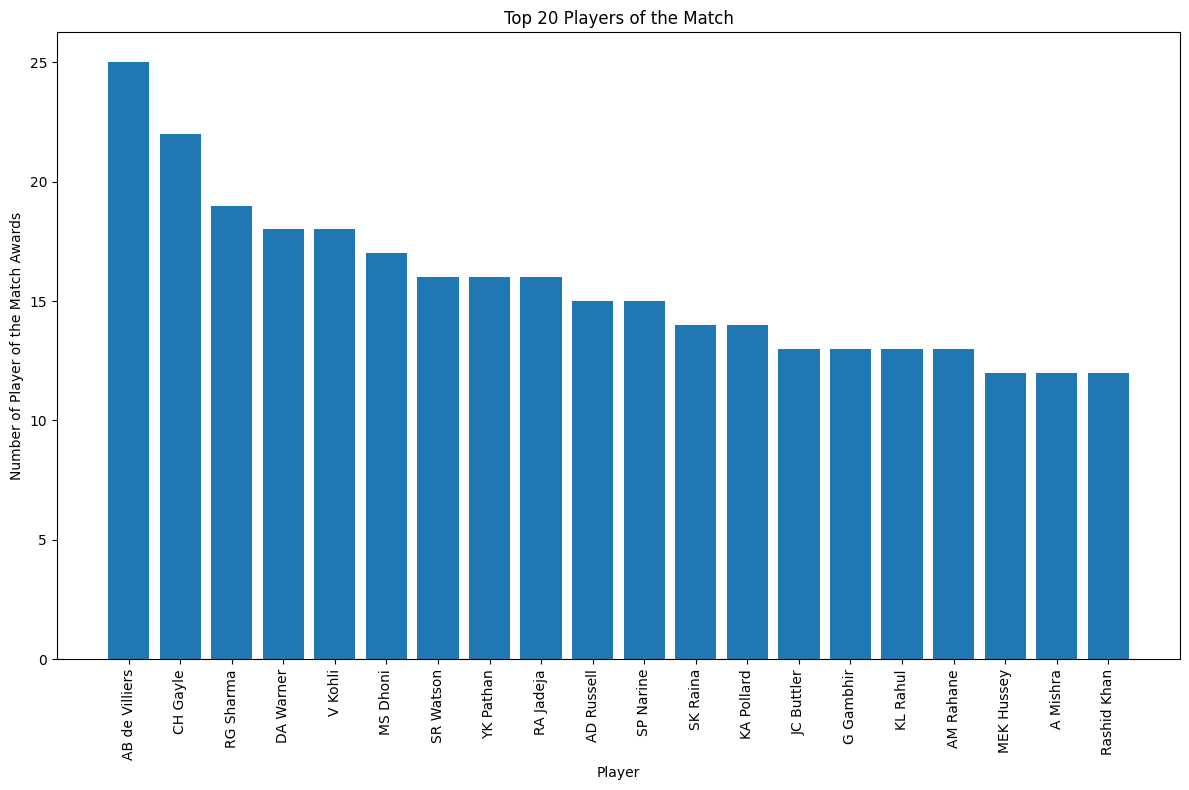

In [ ]:
# prompt: top 20 player of the match bar graph

import matplotlib.pyplot as plt
# Count the number of times each player has been awarded 'Player of the Match'
player_of_match_counts = df['player_of_match'].value_counts()

# Get the top 20 players
top_20_players = player_of_match_counts.head(20)

# Create the bar graph
plt.figure(figsize=(12, 8))
plt.bar(top_20_players.index, top_20_players.values)
plt.xlabel('Player')
plt.ylabel('Number of Player of the Match Awards')
plt.title('Top 20 Players of the Match')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


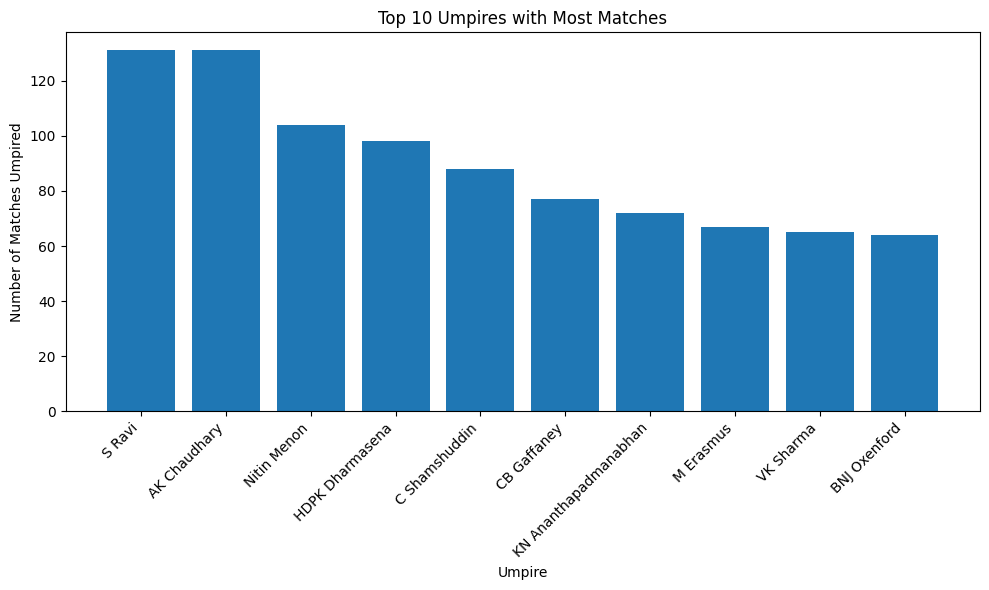

In [ ]:
# prompt: umpire analysis

import pandas as pd
import matplotlib.pyplot as plt
# Combine umpire1 and umpire2 columns to get a list of all umpires
umpires = pd.concat([df['umpire1'], df['umpire2']]).dropna().unique()

# Create a dictionary to store the number of matches umpired by each umpire
umpire_match_count = {}
for umpire in umpires:
  umpire_match_count[umpire] = 0

# Iterate through the DataFrame and count the number of matches for each umpire
for index, row in df.iterrows():
  if not pd.isnull(row['umpire1']):
    umpire_match_count[row['umpire1']] += 1
  if not pd.isnull(row['umpire2']):
    umpire_match_count[row['umpire2']] += 1

# Create a DataFrame from the umpire_match_count dictionary
umpire_df = pd.DataFrame({'Umpire': list(umpire_match_count.keys()), 'Matches Umpired': list(umpire_match_count.values())})

# Sort the DataFrame by the number of matches umpired in descending order
umpire_df = umpire_df.sort_values('Matches Umpired', ascending=False)

# Select the top 10 umpires
top_10_umpires = umpire_df.head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_umpires['Umpire'], top_10_umpires['Matches Umpired'])
plt.xlabel('Umpire')
plt.ylabel('Number of Matches Umpired')
plt.title('Top 10 Umpires with Most Matches')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


                 id  result_margin  target_runs  target_overs
count  1.095000e+03    1095.000000  1095.000000   1095.000000
mean   9.048283e+05      17.098630   165.684932     19.760000
std    3.677402e+05      21.631266    33.381189      1.578989
min    3.359820e+05       1.000000    43.000000      5.000000
25%    5.483315e+05       6.000000   146.000000     20.000000
50%    9.809610e+05       8.000000   166.000000     20.000000
75%    1.254062e+06      19.000000   187.000000     20.000000
max    1.426312e+06     146.000000   288.000000     20.000000
                     id  result_margin  target_runs  target_overs
id             1.000000      -0.007469     0.238556      0.046319
result_margin -0.007469       1.000000     0.393221      0.032241
target_runs    0.238556       0.393221     1.000000      0.352353
target_overs   0.046319       0.032241     0.352353      1.000000


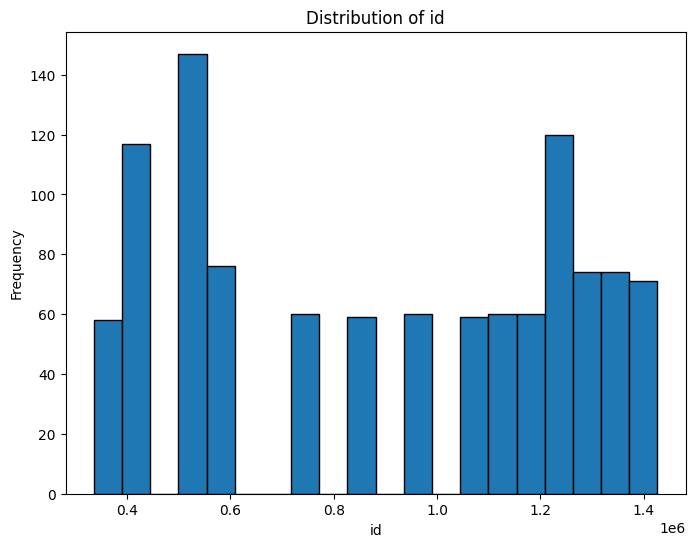

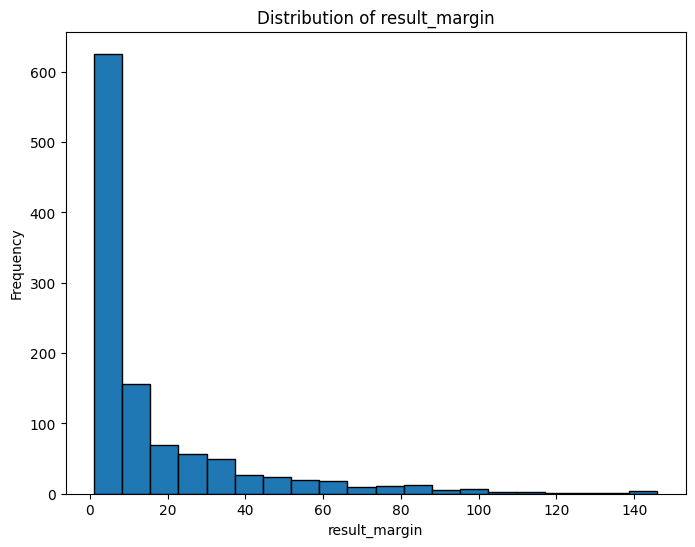

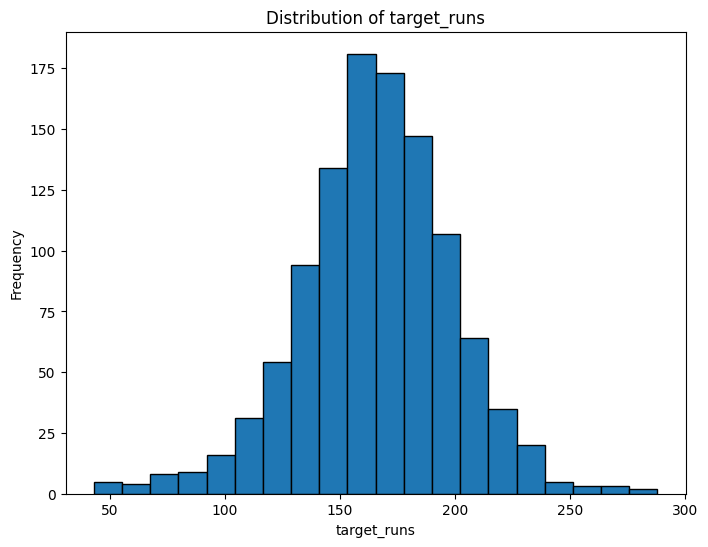

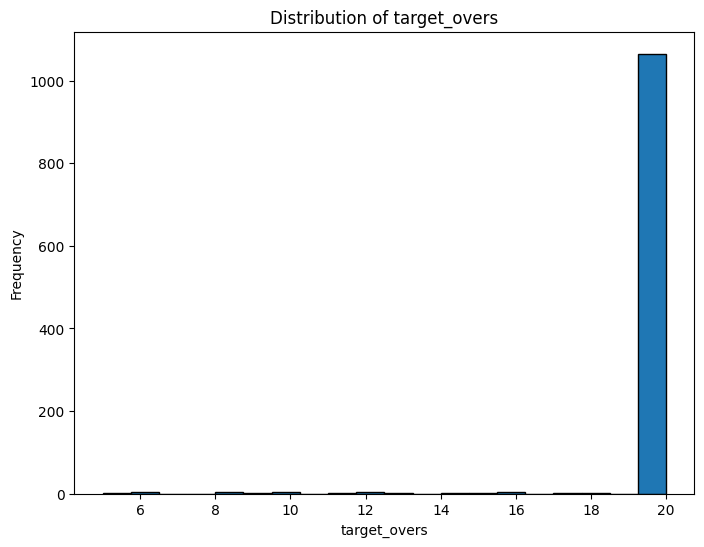

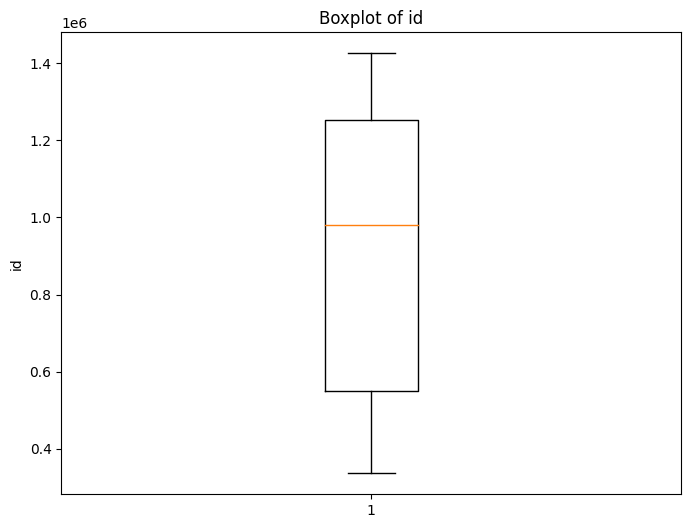

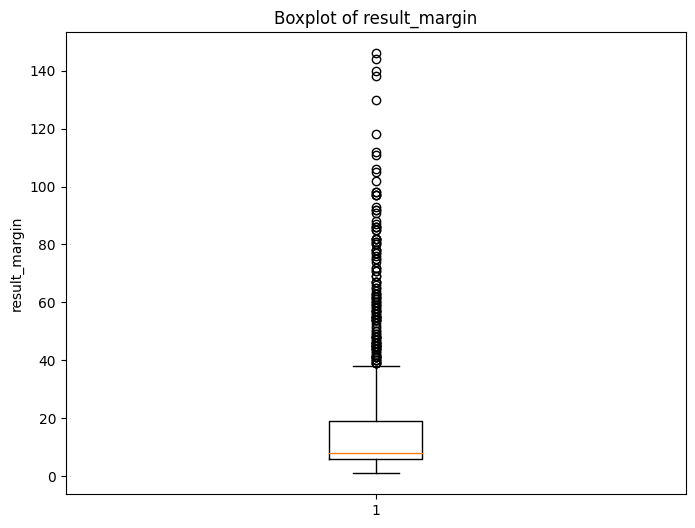

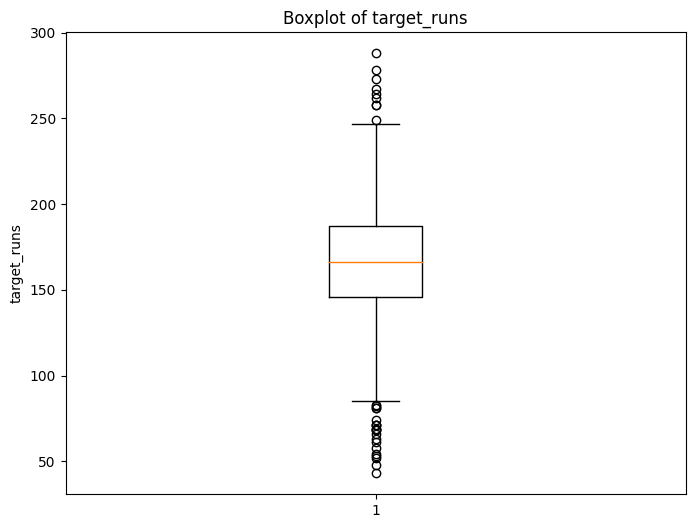

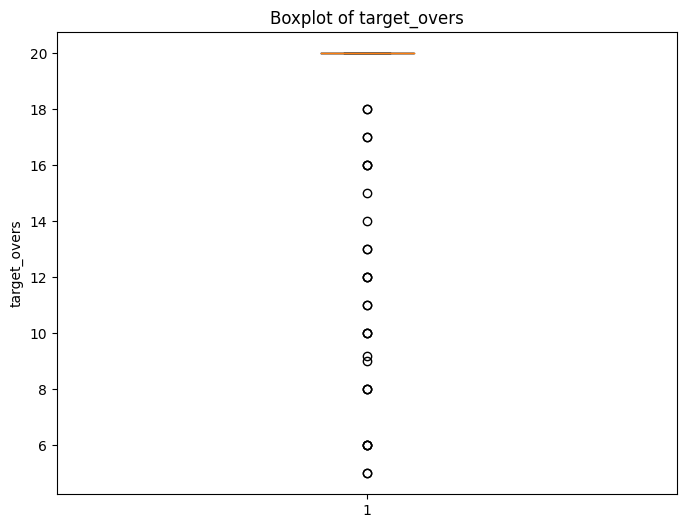

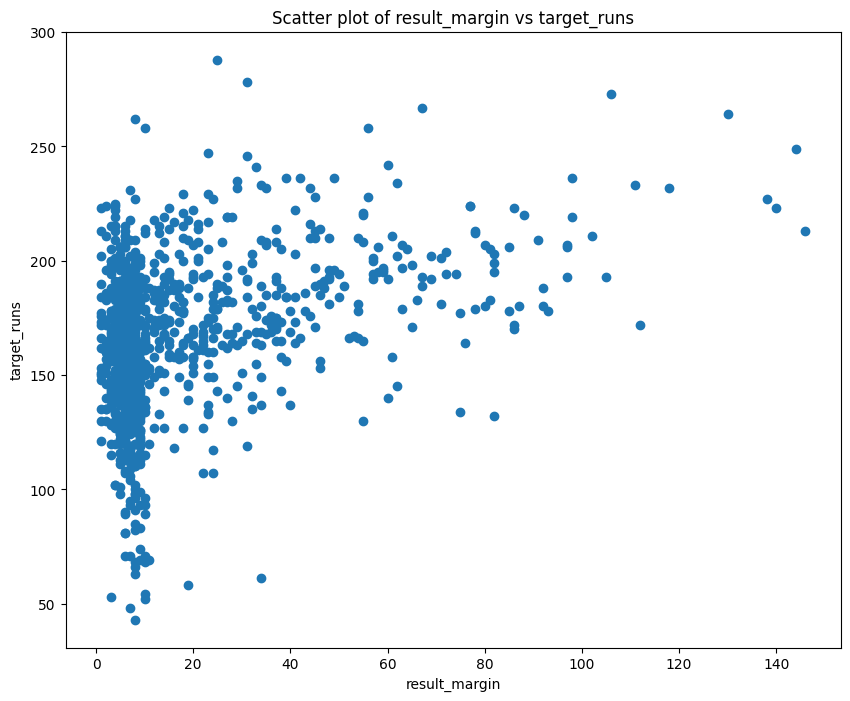

In [ ]:
# prompt: numerical variables analysis

import matplotlib.pyplot as plt
import numpy as np
# Select numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Descriptive statistics for numerical variables
numerical_stats = df[numerical_cols].describe()
print(numerical_stats)

# Correlation matrix for numerical variables
correlation_matrix = df[numerical_cols].corr()
print(correlation_matrix)

# Histograms for numerical variables
for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  plt.hist(df[col], bins=20, edgecolor='black')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title(f'Distribution of {col}')
  plt.show()

# Boxplots for numerical variables
for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  plt.boxplot(df[col])
  plt.ylabel(col)
  plt.title(f'Boxplot of {col}')
  plt.show()

# Scatter plots for pairs of numerical variables
# (You can choose specific pairs to visualize)
plt.figure(figsize=(10, 8))
plt.scatter(df['result_margin'], df['target_runs'])
plt.xlabel('result_margin')
plt.ylabel('target_runs')
plt.title('Scatter plot of result_margin vs target_runs')
plt.show()

